In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('kino.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:

# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,21/01/2019,12:00,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0
1,21/01/2019,13:00,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0
2,21/01/2019,14:00,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7
3,21/01/2019,15:00,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2
4,21/01/2019,16:00,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7


In [4]:

# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [7]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DIRS             float64
DIRR             float64
VELS             float64
VELR             float64
TEMP             float64
HR               float64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [8]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

KeyError: ('DD/MM/AAAA', 'occurred at index 0')

In [9]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0,2019-01-21 12:00:00
1,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0,2019-01-21 13:00:00
2,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7,2019-01-21 14:00:00
3,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2,2019-01-21 15:00:00
4,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7,2019-01-21 16:00:00


In [10]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,125.00000,125.00000,125.000000,124.000000,124.000000,123.000000,123.000000,123.0,123.000000
mean,248.20000,260.67680,17.444880,28.163710,16.071774,48.845528,1016.539837,0.0,177.134146
std,75.27573,98.36992,23.819549,11.434418,3.790200,16.473542,2.755047,0.0,257.860939
min,14.00000,11.00000,0.420000,7.200000,7.000000,17.000000,1010.800000,0.0,-1.000000
25%,252.00000,252.00000,9.150000,20.800000,13.900000,37.500000,1014.850000,0.0,-1.000000
50%,270.00000,273.00000,15.210000,27.000000,16.100000,48.000000,1016.100000,0.0,-1.000000
75%,283.00000,285.00000,20.470000,36.000000,18.675000,59.000000,1017.850000,0.0,312.500000
max,346.00000,1017.60000,266.700000,55.400000,22.600000,91.000000,1022.800000,0.0,771.300000


In [11]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA


In [12]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       248.200000
DIRR       260.676800
VELS        17.444880
VELR        28.163710
TEMP        16.071774
HR          48.845528
PB        1016.539837
PREC         0.000000
RADSOL     177.134146
dtype: float64

In [13]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

16.071774193548386

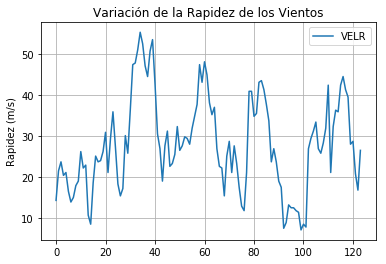

In [20]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

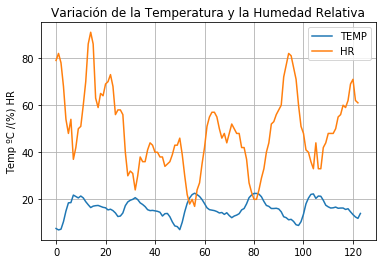

In [16]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

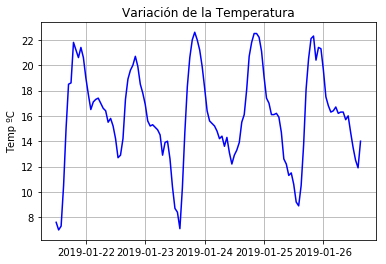

In [17]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

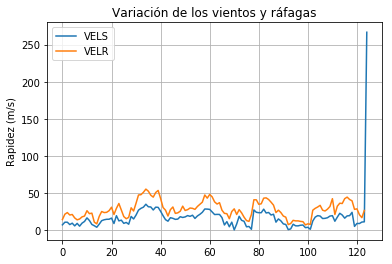

In [31]:
# Gráfica de la rapidez de los vientos y rágafas en función del tiempo 
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de los vientos y ráfagas")
plt.ylabel("Rapidez (m/s)")
#plt.xlabel("seg")
plt.grid(True)
plt.show()

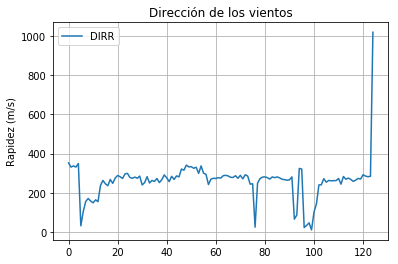

In [28]:
#  dirección de los vientos como función del tiempo 
plt.figure(); df.DIRR.plot(); plt.legend(loc='best')
plt.title("Dirección de los vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

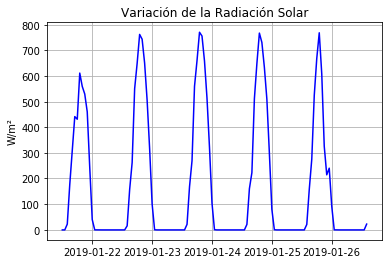

In [35]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la Radiación Solar")
plt.ylabel("W/m²")
plt.grid(True)
plt.show()

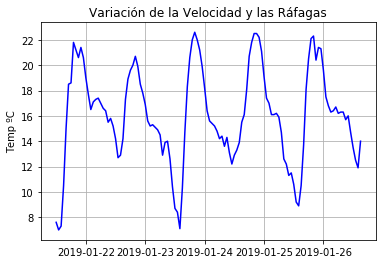

In [37]:
df1 = df[['VELR','VELS']]
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Velocidad y las Ráfagas")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()